In [6]:
from matplotlib import pyplot
#2x+y
# Data de ejemplo
# f_obj = [2,1]
# ineq = [[2,0],[3,1],[0,3],[0,1]]
# ineq_s = [0,1,0,1]
# ineq_r = [20,5,8,2]


## Recopilar datos

In [18]:
def extract_eq(eq_str):
    
    eq_str = eq_str.split()
    #print(eq_str)
    a = 0
    b = 0
    s = 0
    r = 0
    for i in range(len(eq_str)):
        if "x" in eq_str[i]:
            if eq_str[i]== "x":
                a = 1
            else:
                a = int(eq_str[i][0:len(eq_str[i])-1])

        if "y" in eq_str[i]:
            if eq_str[i]== "y":
                b = 1
            else:
                b = int(eq_str[i][0:len(eq_str[i])-1])

        if "<=" in eq_str[i]:
            s = 0

        if ">=" in eq_str[i]:
            s = 1

        if "<=" in eq_str[i] or ">=" in eq_str[i]:
            r = int(eq_str[i+1])
            
    print("extract: {}, {} ,{} ,{}".format(a , b , s, r))
    return a , b , s, r



In [19]:
def input_data():
    f_obj = []
    ineq  = []
    ineq_s = [] 
    ineq_r = []
    obj_a = int(input("Según la funcion objetivo ax+by introduce a:"))
    obj_b = int(input("Según la funcion objetivo ax+by introduce b:"))
    f_obj = [obj_a,obj_b]
    n = int(input("Cuantas inecuaciones desea ingresar [3,8]"))
    for i in range(n):
        print("Inequacion Número {}:".format(i+1))
        
        inequation = input("Ingrese inecuación: (Ej: 2x + 3y =< 4 o 10x + 2y >= 4)")
        
        a , b , s ,r = extract_eq(inequation)
        #print("Valores obtenidos:")
        #print(a,b,s,r)
        ineq.append([a,b])
        ineq_s.append(s)
        ineq_r.append(r)
        
    return f_obj , ineq , ineq_s , ineq_r





## Representar la inecuacion como un string según los datos recopilados

In [20]:
#Según los datos recogidos te grafica el array
def create_label(a , b , s , r):
    print(a,b,s,r)
    ineq_label = "" 
    
    if a == 1:
        ineq_label = ineq_label + "x"
    elif a > 1:
        ineq_label = ineq_label + "{}x".format(a)
    if 0< a and 0 <b:
        ineq_label = ineq_label + " + "
    if b == 1:
        ineq_label = ineq_label + "y"
    elif b > 1: 
        ineq_label = ineq_label + "{}y".format(b)
    
    if s:
        symbol = " >= "
    else:
        symbol = " <= "
    
    ineq_label += symbol
    ineq_label += "{}".format(r)
    
        
    return ineq_label

## Dibujar inecaciones

In [21]:
def graph_inec(ineq,ineq_r,ineq_s):
    for i , r , s in zip(ineq,ineq_r,ineq_s):
        l=10
        #print(i,r)
        x=i[0]
        y=i[1]
        if x != 0 and y!=0:
            px= [r/x,0]
            py = [0,r/y]
        elif x!=0:
            px= [r/x,r/x]
            py = [0,l]
        elif y != 0:
            px = [0,l]
            py = [r/y,r/y]
            
        
        equation = create_label(i[0],i[1],s,r)
        
        pyplot.plot(px,py, label=equation)
    pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

Según la funcion objetivo ax+by introduce a: 2
Según la funcion objetivo ax+by introduce b: 2
Cuantas inecuaciones desea ingresar [3,8] 1


Inequacion Número 1:


Ingrese inecuación: (Ej: 2x + 3y =< 4 o 10x + 2y >= 4) y >= 2


['y', '>=', '2']
extract: 0, 1 ,1 ,2
Valores obtenidos:
0 1 1 2
0 1 1 2


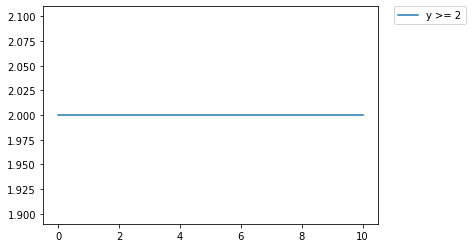

In [23]:
# Data de ejemplo
# f_obj = [2,1]    2x + y

# 2x <= 20
# 3x + y >= 5
# 3y <= 8
# y >= 2


# ineq = [[2,0],[3,1],[0,3],[0,1]]  
# ineq_s = [0,1,0,1]
# ineq_r = [20,5,8,2]

f_obj , ineq , ineq_s ,ineq_r = input_data()

graph_inec(ineq,ineq_r,ineq_s)

2 0 0 20
3 1 1 5
0 3 0 8
0 1 1 2


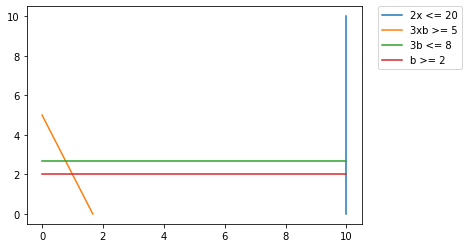

In [17]:
# ineq = [[2,0],[3,1],[0,3],[0,1]]  
# ineq_s = [0,1,0,1]
# ineq_r = [20,5,8,2]
# graph_inec(ineq,ineq_r,ineq_s)

## Encontrar puntos de intersección

2 2 0 20
0 3 1 9


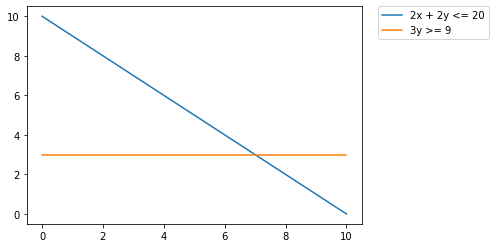

In [24]:
i = [[2,2],[0,3]]
ir = [20,9]
s = [0,1]
graph_inec(i,ir,s)

In [25]:
def intersection(L1, L2, R1, R2):
    D  = L1[0] * L2[1] - L1[1] * L2[0]
    Dx = R1 * L2[1] - L1[1] * R2
    Dy = L1[0] * R2 - R1 * L2[0]
    if D != 0:
        x = Dx / D
        y = Dy / D
        return x,y
    else:
        return False

2 2 0 20
0 3 1 9


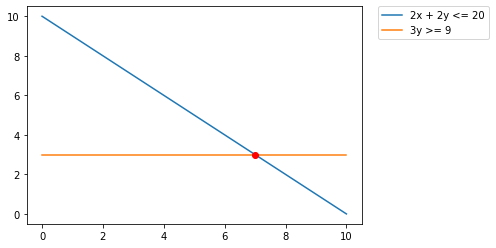

In [27]:
graph_inec(i,ir,s)
R = intersection([2,2],[0,3],20,9)
pyplot.plot(R[0],R[1],'ro')

In [73]:
def graph_inter(ineq,ineq_r):
    interX = []
    interY = []
    inter = []
    for ine1 , r1 in zip(ineq,ineq_r):
        for ine2 , r2 in zip(ineq,ineq_r):
            R = intersection(ine1,ine2,r1,r2)
            if R and R[0]>0 and R[1]>0:
                if [R[1],R[0]] not in inter:
                    interX.append(R[0])
                    interY.append(R[1])
                    inter.append([R[0],R[1]])
    
    pyplot.plot(interX,interY,'ro')
    return interX,interY , inter

2 4 1 20
3 0 0 5
0 3 1 8
0 1 40 2


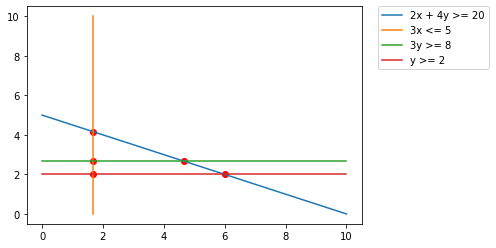

In [74]:
ineq = [[2,4],[3,0],[0,3],[0,1]]   
ineq_r = [20,5,8,2]
ineq_s = [1,0,1,40]
interX,interY , inter = graph_inter(ineq,ineq_r)
graph_inec(ineq,ineq_r,ineq_s)

## TODO: 
- [x] Una función que le des la inecuación en texto ej: 2x+3y>=20 y te devuelva [2,3] [20] [0].**El =< , >= se representarían como [0,1]**
- [x] Representar el menor igual y mayor igual (>= , <=) en las inecuaciones lineales
- [ ] Determinar la region probando las intersecciónes en todas las inecuaciones. Si es falso esa intersección no pertenece a la región 

In [86]:
def comprobar_region(inter):
    
    
    return

In [90]:
inter[0][1]

1.6666666666666667